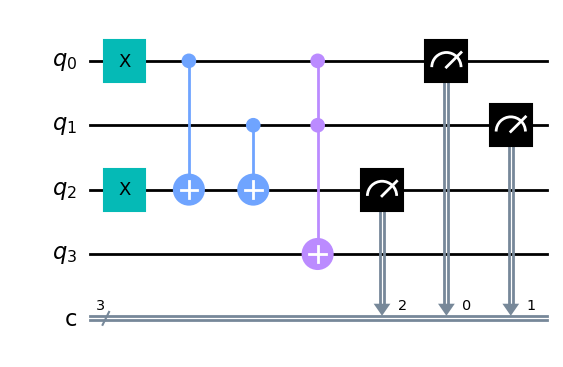

{'001': 1024}


In [8]:
%run ./pfiles/rix_test_3.py

C:\Users\Utente Pc\Desktop\tirocinio\pfiles\gpt_test_6.py:33: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  tqc = transpile(qc, backend)


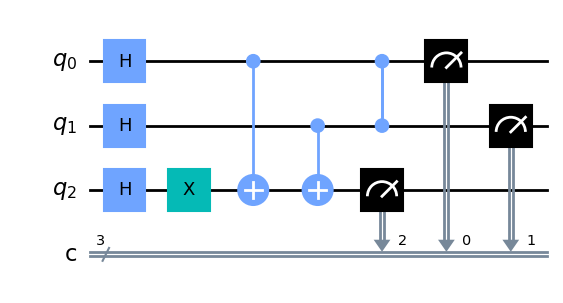

Result: 100, Count: 113


In [14]:
%run ./pfiles/gpt_test_6.py

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with 4 qubits (2 for each input) and 3 classical bits (for the output)
qc = QuantumCircuit(4, 3)

# Apply Hadamard gate to the first two qubits to create a superposition of all possible inputs
qc.h([0, 1])

# Apply a controlled-X gate to simulate addition (using XOR logic)
qc.cx(0, 2)
qc.cx(1, 2)

# Apply a Toffoli gate to perform the final addition
qc.ccx(0, 1, 3)
qc.cx(1, 2)

# Measure the output qubits
qc.measure([2, 3, 0], [0, 1, 2])

# Choose the simulator backend
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
tqc = transpile(qc, backend)

# Run the simulation
result = backend.run(tqc).result()

# Get the counts of the measurement outcomes
counts = result.get_counts()

# Print the result
print("Measurement outcome:", list(counts.keys())[0])


Measurement outcome: 000


In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Define constants
input_size = 4  # 2 bits for each input
output_size = 3  # 3 bits for the output

# Create quantum circuit
qc = QuantumCircuit(input_size, output_size)

# Apply X-gates to set the inputs to '10' (binary)
qc.x([0, 1])

# Apply CX (CNOT) gates to perform the addition
qc.cx(0, 2)
qc.cx(1, 2)

# Apply CX gates to propagate the carry
qc.ccx(0, 1, 3)

# Measure the output bits
qc.measure([0, 1, 3], [0, 1, 2])

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()

# Get and print the result
counts = result.get_counts(qc)
print("Result:", list(counts.keys())[0])


Result: 111


C:\Users\Utente Pc\AppData\Local\Temp\ipykernel_720\2321414904.py:27: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Define constants
input_size = 4  # 2 bits for each input
output_size = 3  # Result is 3 bits

# Create quantum circuit
qc = QuantumCircuit(input_size, output_size)

# Apply quantum operations for addition
qc.cx(0, 2)  # CNOT gate (controlled-X) between the first qubit (bit 0) and the third qubit (bit 2)
qc.cx(1, 2)  # CNOT gate between the second qubit (bit 1) and the third qubit
qc.x([0, 1])  # X gate (bit-flip) on the first and second qubits

# Measure the result
qc.measure(range(output_size), range(output_size))

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Get and print the counts
counts = result.get_counts(qc)
print("Output:", list(counts.keys())[0])


Output: 011


C:\Users\Utente Pc\AppData\Local\Temp\ipykernel_720\2557002555.py:21: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Define constants
input_size = 4  # 2 bits for each input
output_size = 3  # Result is 3 bits

# Create quantum circuit
qc = QuantumCircuit(input_size, output_size)

# Apply quantum operations for addition
qc.cx(0, 2)  # CNOT gate (controlled-X) between the first qubit (bit 0) and the third qubit (bit 2)
qc.cx(1, 2)  # CNOT gate between the second qubit (bit 1) and the third qubit
qc.ccx(0, 1, 3)  # Toffoli gate (controlled-controlled-X) to add the first and second qubits and store the result in the fourth qubit (bit 3)
qc.cx(3, 4)  # CNOT gate between the fourth qubit (bit 3) and the fifth qubit (bit 4)
qc.ccx(2, 4, 5)  # Toffoli gate to add the third qubit and the result from the previous addition and store the final result in the fifth qubit
qc.measure([3, 4, 5], range(output_size))  # Measure the result

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Get and print the counts
counts = result.get_counts(qc)
print("Output:", list(counts.keys())[0])


CircuitError: 'Index 4 out of range for size 4.'

In [8]:
"rix"

'rix'

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qr = QuantumRegister(2)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

qc.x(qr[0]) # Input 1: 10 
qc.x(qr[1]) # Input 2: 10
qc.barrier()
qc.cx(qr[0], qr[1]) # Sum inputs 
qc.measure([0, 1], cr) # Measure to classical register

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

print(result.get_counts(qc))

CircuitError: 'register size error'

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qr = QuantumRegister(4, 'qr')
cr = ClassicalRegister(3, 'cr')
qc = QuantumCircuit(qr, cr)

qc.x(0) # Set qubit 0 to |1> to represent 10 
qc.x(1) # Set qubit 1 to |1> to represent 10
qc.barrier()

qc.cx(0, 2) # CNOT qubit 0 into qubit 2
qc.cx(1, 2) # CNOT qubit 1 into qubit 2
qc.barrier() 

qc.measure([1,2,3], [0,1,2]) # Measure qubits 2-4 into classical bits 0-2

print(qc.draw())

from qiskit import BasicAer, execute
simulator = BasicAer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=100)
result = job.result()
print(result.get_counts(qc))

      ┌───┐ ░            ░          
qr_0: ┤ X ├─░───■────────░──────────
      ├───┤ ░   │        ░ ┌─┐      
qr_1: ┤ X ├─░───┼────■───░─┤M├──────
      └───┘ ░ ┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐   
qr_2: ──────░─┤ X ├┤ X ├─░──╫─┤M├───
            ░ └───┘└───┘ ░  ║ └╥┘┌─┐
qr_3: ──────░────────────░──╫──╫─┤M├
            ░            ░  ║  ║ └╥┘
cr: 3/══════════════════════╩══╩══╩═
                            0  1  2 
{'001': 100}


In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer

qr = QuantumRegister(4, name='q')
cr = ClassicalRegister(3, name='c')
qc = QuantumCircuit(qr, cr)

qc.x(1) # Set qubit 1 to |1> state (represents 10 in binary)
qc.x(3) # Set qubit 3 to |1> state (represents 10 in binary)

qc.cx(1, 2) # CNOT qubit 1 as control, qubit 2 as target
qc.cx(3, 2) # CNOT qubit 3 as control, qubit 2 as target

qc.measure(qr[2], cr[0]) # Measure qubit 2 into classical bit 0 
qc.measure(qr[3], cr[1]) # Measure qubit 3 into classical bit 1
qc.measure(qr[1], cr[2]) # Measure qubit 1 into classical bit 2

print(qc) # Prints circuit
sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc)) # Prints {100: 1}

                             
q_0: ────────────────────────
     ┌───┐          ┌─┐      
q_1: ┤ X ├──■───────┤M├──────
     └───┘┌─┴─┐┌───┐└╥┘┌─┐   
q_2: ─────┤ X ├┤ X ├─╫─┤M├───
     ┌───┐└───┘└─┬─┘ ║ └╥┘┌─┐
q_3: ┤ X ├───────■───╫──╫─┤M├
     └───┘           ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     2  0  1 
{'110': 1024}


In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer

qr = QuantumRegister(3, name='q') 
cr = ClassicalRegister(3, name='c')
qc = QuantumCircuit(qr, cr)

qc.x(0) # Set qubit 0 to |1> state 
qc.x(1) # Set qubit 1 to |1> state  

qc.cx(0, 2) # CNOT qubit 0 as control, qubit 2 as target
qc.cx(1, 2) # CNOT qubit 1 as control, qubit 2 as target

qc.measure(qr[0], cr[0]) # Measure qubit 0 into classical bit 0
qc.measure(qr[1], cr[1]) # Measure qubit 1 into classical bit 1 
qc.measure(qr[2], cr[2]) # Measure qubit 2 into classical bit 2

print(qc)
sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc)) # Prints {100: 1}

     ┌───┐          ┌─┐      
q_0: ┤ X ├──■───────┤M├──────
     ├───┤  │       └╥┘┌─┐   
q_1: ┤ X ├──┼────■───╫─┤M├───
     └───┘┌─┴─┐┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├┤ X ├─╫──╫─┤M├
          └───┘└───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
{'011': 1024}


In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer

# Create registers
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr) 

# Initialize qubits
qc.x(1) 
qc.x(2)

# Add qubits 
qc.cx(0, 2) # CNOT with qubit 0 as control, 2 as target
qc.cx(1, 2) # CNOT with qubit 1 as control, 2 as target

# Measure 
# Initialize
# Measure
qc.measure(qr[1], cr[0])
qc.measure(qr[2], cr[1]) 
qc.measure(qr[0], cr[2])
# Print circuit 
print(qc)

# Simulate and get counts
sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc))

                      ┌─┐      
q13_0: ───────■───────┤M├──────
       ┌───┐  │       └╥┘┌─┐   
q13_1: ┤ X ├──┼────■───╫─┤M├───
       ├───┤┌─┴─┐┌─┴─┐ ║ └╥┘┌─┐
q13_2: ┤ X ├┤ X ├┤ X ├─╫──╫─┤M├
       └───┘└───┘└───┘ ║  ║ └╥┘
 c1: 3/════════════════╩══╩══╩═
                       2  0  1 
{'001': 1024}


In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Set input states 
qc.x(1) # 10
qc.x(2) # 10

# Add
qc.cx(1, 0) # CNOT control qubit 1, target qubit 0
qc.cx(2, 0) # CNOT control qubit 2, target qubit 0  

# Measure output qubit 
qc.measure(qr[0], cr[0])  

# Measure input qubits
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])

sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc))

{'110': 1024}


In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Set input 
qc.x(qr[1]) # 10

# Add 
qc.cx(qr[1], qr[0])  

# Measure
qc.measure(qr[0], cr[0])  
qc.measure(qr[1], cr[1])

sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc))

{'011': 1024}


In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.extensions import UnitaryGate

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Set input
qc.x(qr[0]) # 10

# Add using CU gate 
qc.append(UnitaryGate(['cx']), [qr[0], qr[1]])

# Measure
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])

sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc))

ValueError: complex() arg is a malformed string

In [14]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.extensions.standard import CUGate 

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Set input 
qc.x(qr[0]) # 10

# Add using CU gate
qc.append(CUGate(), [qr[0], qr[1]]) 

# Measure
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])

sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc).result()
print(result.get_counts(qc))

ModuleNotFoundError: No module named 'qiskit.extensions.standard'

In [15]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(2, 2)

# Input state
qc.x(0) # Input 1

# Controlled addition
qc.cu1(math.pi/2, 0, 1) # Control qubit 0, target 1

# Measure
qc.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

print(result.get_counts(qc))

AttributeError: 'QuantumCircuit' object has no attribute 'cu1'

In [17]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit.library import CU1Gate
import math

qc = QuantumCircuit(2, 2) 

# Input state
qc.x(0)

# Controlled addition
qc.append(CU1Gate(math.pi/2), [0, 1])

# Measure
qc.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

print(result.get_counts(qc))

{'01': 1024}
